In [1]:
!pip install mysql-connector-python

     ---------------------------------------- 10.9/10.9 MB 2.8 MB/s eta 0:00:00
     -------------------------------------- 527.0/527.0 kB 1.8 MB/s eta 0:00:00


In [1]:
import mysql.connector
import pandas as pd

#logging into mysql
db_config={
    'host':'localhost',
    'user':'root',
    'password':'syed0627',
    'database':'test_db',
}

#create the connection
connection=mysql.connector.connect(**db_config)

query='select * from finaldata;'

#read data from mysql into pandas dataframe
df=pd.read_sql(query,connection)

C:\Users\kash4\AppData\Local\Temp\ipykernel_6812\1157553624.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,connection)


In [3]:
#closing the connection
connection.close()

In [2]:
import numpy as np
df.head()

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,2022-01-06,1,0,55.406,59.260,0,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,2022-07-23,1,0,768.638,950.800,0,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,2022-06-23,1,0,774.266,4004.214,0,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,2022-03-17,2,0,40.798,81.044,0,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,2022-12-21,1,0,40.434,40.504,0,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM


In [7]:
df.describe()

,Patient_ID,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP
count,1.421800e+04,14218.000000,14218.000000,14218.000000,14218.000000,14218.000000
mean,1.201809e+10,2.231748,0.291954,124.823957,234.038300,29.132649
std,2.810229e+04,5.132043,1.643322,464.782794,671.261572,182.265426
min,1.201800e+10,0.000000,0.000000,40.000000,0.000000,0.000000
25%,1.201808e+10,1.000000,0.000000,44.928000,47.815000,0.000000
50%,1.201809e+10,1.000000,0.000000,53.650000,86.424000,0.000000
75%,1.201811e+10,2.000000,0.000000,77.800000,181.000000,0.000000
max,1.201813e+10,150.000000,50.000000,33178.000000,39490.000000,8014.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14218 entries, 0 to 14217
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Typeofsales     14218 non-null  object 
 1   Patient_ID      14218 non-null  int64  
 2   Specialisation  14218 non-null  object 
 3   Dept            14218 non-null  object 
 4   Dateofbill      14218 non-null  object 
 5   Quantity        14218 non-null  int64  
 6   ReturnQuantity  14218 non-null  int64  
 7   Final_Cost      14218 non-null  float64
 8   Final_Sales     14218 non-null  float64
 9   RtnMRP          14218 non-null  int64  
 10  Formulation     14218 non-null  object 
 11  DrugName        14218 non-null  object 
 12  SubCat          14218 non-null  object 
 13  SubCat1         14218 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 1.5+ MB


In [14]:
#changing the type of dateofbill column
df['Dateofbill']=pd.to_datetime(df['Dateofbill'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14218 entries, 0 to 14217
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Typeofsales     14218 non-null  object        
 1   Patient_ID      14218 non-null  int64         
 2   Specialisation  14218 non-null  object        
 3   Dept            14218 non-null  object        
 4   Dateofbill      14218 non-null  datetime64[ns]
 5   Quantity        14218 non-null  int64         
 6   ReturnQuantity  14218 non-null  int64         
 7   Final_Cost      14218 non-null  float64       
 8   Final_Sales     14218 non-null  float64       
 9   RtnMRP          14218 non-null  int64         
 10  Formulation     14218 non-null  object        
 11  DrugName        14218 non-null  object        
 12  SubCat          14218 non-null  object        
 13  SubCat1         14218 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)


In [15]:
#Removing all duplicates from the dataset
df.drop_duplicates(inplace=True)
#checking the no.of rows after deleting duplicate rows
df.shape[0]

14192

In [21]:
#replacing empty cell values with null in data frame
df1=df.replace('',np.nan)
#checking the no.of null values
df1.isnull().sum()

Typeofsales          0
Patient_ID           0
Specialisation       0
Dept                 0
Dateofbill           0
Quantity             0
ReturnQuantity       0
Final_Cost           0
Final_Sales          0
RtnMRP               0
Formulation        650
DrugName          1659
SubCat            1659
SubCat1           1682
dtype: int64

In [24]:
#from the above there are 1659 transaction in which we dont have the record of Drugname 
#removing them would not be ideal because we may loose the imp data of sales and cost
# so we replace null with 'unknown' string
df.replace('','Unknown',inplace=True)
df.isnull().sum()

Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       0
DrugName          0
SubCat            0
SubCat1           0
dtype: int64

array([[<Axes: title={'center': 'Patient_ID'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'ReturnQuantity'}>,
        <Axes: title={'center': 'Final_Cost'}>],
       [<Axes: title={'center': 'Final_Sales'}>,
        <Axes: title={'center': 'RtnMRP'}>]], dtype=object)

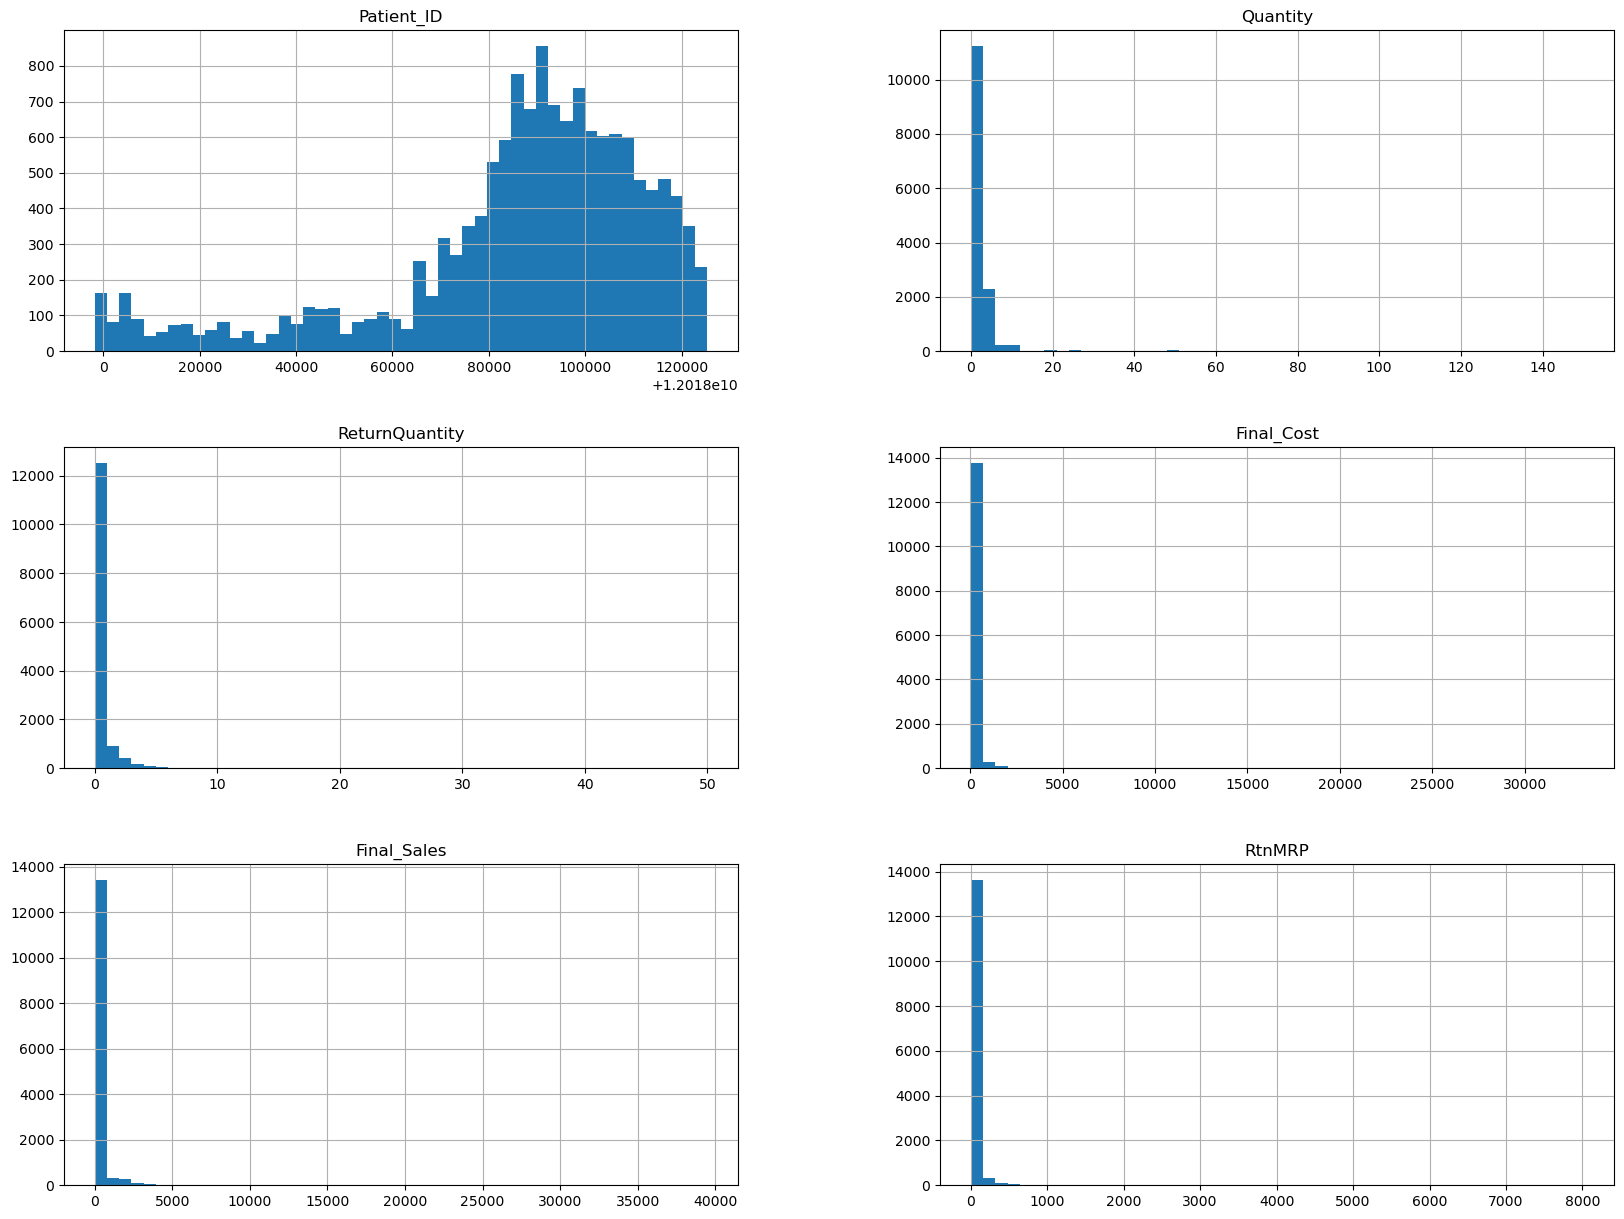

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

#visualizing the frequency count plt
df.hist(bins=50,figsize=(20,15))


In [44]:
df['Dept'].value_counts()
df['Patient_ID'].value_counts()
print(df.columns.values)
#df['Specialisation'].value_counts()
df['Dateofbill'].value_counts()
df['Typeofsales'].value_counts()

['Typeofsales' 'Patient_ID' 'Specialisation' 'Dept' 'Dateofbill'
 'Quantity' 'ReturnQuantity' 'Final_Cost' 'Final_Sales' 'RtnMRP'
 'Formulation' 'DrugName' 'SubCat' 'SubCat1']


Sale      12516
Return     1676
Name: Typeofsales, dtype: int64

In [51]:
#print no.of distinct values
print(df['Specialisation'].nunique())
print(df['Dept'].nunique())

58
3


In [62]:
#getting the highest no.of drugs where Final_sales is zero or which has been returned frequently
df.loc[df['Final_Sales']==0,'DrugName'].value_counts()

Unknown                                                     162
SODIUM CHLORIDE IVF 100ML                                   112
SODIUM CHLORIDE 0.9%                                         95
MULTIPLE ELECTROLYTES 500ML IVF                              88
PANTOPRAZOLE 40MG INJ                                        57
                                                           ... 
BENZYDAMINE 0.15%W/V                                          1
CEFIXIME 200MG                                                1
CALCIUM 250MG + VITAMIN D3 125IU                              1
DEXTROSE 5%W/V + SODIUM CHLORIDE 0.45%W/V 500ML IV FLUID      1
LABETALOL 20MG INJ                                            1
Name: DrugName, Length: 250, dtype: int64

In [48]:
# Calculate the total sales for each drug by grouping the DataFrame by 'DrugName'
drug_sales = df.groupby('DrugName')['Final_Sales'].sum().sort_values(ascending=False)

# Display the top high-selling drugs and their total sales
drug_sales.head(10)

# By focusing on high-selling drugs, you can ensure their availability in the inventory and implement strategies to promote
# and highlight these products. This can lead to increased revenue and a positive impact on overall 
# profitability. Continuous monitoring of sales performance will also help you stay updated on changes in the 
# popularity of drugs and adapt your strategies accordingly.

DrugName
                                      436786.550
HUMAN ALBUMIN 25% INJ                 314856.400
MEROPENEM 1GM INJ                     219485.942
LIPOSOMAL AMPHOTERICIN B 50MG INJ     105262.600
PARACETAMOL 1GM IV INJ                 94146.758
TIGECYCLINE 50MG INJ                   91407.900
MULTIPLE ELECTROLYTES 500ML IVF        88019.200
MICAFUNGIN 50MG INJ                    85760.032
PIPERACILLIN 4GM+ TAZOBACTAM 500MG     75899.548
SODIUM CHLORIDE IVF 100ML              61403.952
Name: Final_Sales, dtype: float64

In [67]:
#finding Correlation betwen columns
corr_matrix=df.corr(numeric_only=True)
corr_matrix
# corr_matrix['Quantity'].sort_values(ascending=False)

,Patient_ID,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP
Patient_ID,1.000000,-0.001877,0.003644,-0.000503,-0.006306,-0.001417
Quantity,-0.001877,1.000000,-0.077237,0.017216,0.360254,-0.069524
ReturnQuantity,0.003644,-0.077237,1.000000,-0.003975,-0.061833,0.509335
Final_Cost,-0.000503,0.017216,-0.003975,1.000000,0.865893,0.153145
Final_Sales,-0.006306,0.360254,-0.061833,0.865893,1.000000,-0.055658
RtnMRP,-0.001417,-0.069524,0.509335,0.153145,-0.055658,1.000000


In [69]:
#From the correlation matrix we observe that Final_sales & Final_cost are highly correlated
corr_matrix['Final_Sales'].sort_values(ascending=False)

Final_Sales       1.000000
Final_Cost        0.865893
Quantity          0.360254
Patient_ID       -0.006306
RtnMRP           -0.055658
ReturnQuantity   -0.061833
Name: Final_Sales, dtype: float64

<Axes: xlabel='Final_Cost', ylabel='Final_Sales'>

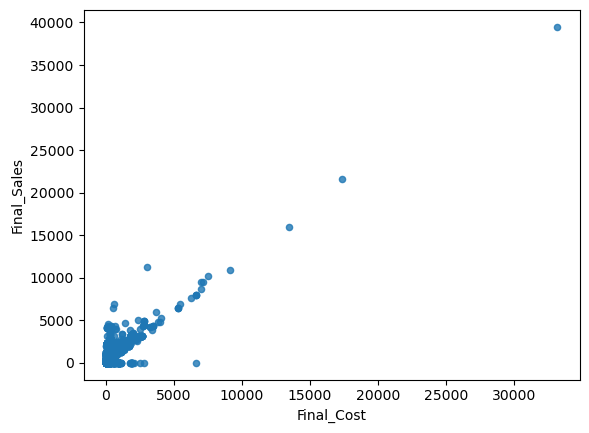

In [77]:
#Visualizing the correlationg between Final_sales & Final_cost
df.plot(kind='scatter',x='Final_Cost',y='Final_Sales',alpha=0.8)

In [73]:
Total_sales = df.groupby('Dept')['Final_Sales'].sum().reset_index()
Total_sales


,Dept,Final_Sales
0,Department1,2965963.874
1,Department2,279242.898
2,Department3,71983.144


In [27]:

df.columns

Index(['Typeofsales', 'Patient_ID', 'Specialisation', 'Dept', 'Dateofbill',
       'Quantity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP',
       'Formulation', 'DrugName', 'SubCat', 'SubCat1'],
      dtype='object')

In [39]:
# Calculate the profit for each drug (Final_Sales - Final_Cost)
df['Profit'] = df['Final_Sales'] - df['Final_Cost']

# Calculate the profit margin for each drug (Profit / Final_Sales)
df['Profit_Margin'] = df['Profit'] / df['Final_Sales']

# Analyze profit margins and identify opportunities for pricing adjustments
low_margin_drugs = df[df['Profit_Margin'] < 0.05]  # Example threshold for low margin drugs

# Display the low margin drugs and their profit margins
print(low_margin_drugs[['DrugName', 'Final_Cost', 'Final_Sales', 'Profit', 'Profit_Margin']])
# By analyzing the 'low_margin_drugs' DataFrame, you can gain insights into which drugs may need pricing adjustments 
# or other strategies to increase profitability. You may consider implementing promotions, discounts, or volume-based pricing 
# for low-margin drugs, or explore ways to reduce costs associated with these products.
# It is observed that in more than 3500 cases the profit margin was less than 5% 
# Therefore necessary strategies can be implemented to adjust those profit margin 
#calcute total profit
total_profit=df['Profit'].sum()
print(f'total_profit is:{total_profit}')

Low_mar_prof=low_margin_drugs['Profit'].sum()
Low_mar_prof
# by adjusting  the profit margin we can increase the profit by nearly 2 lakhs 


                              DrugName  Final_Cost  Final_Sales  Profit  \
4                        LORAZEPAM 1MG      40.434       40.504   0.070   
5                     SALBUTAMOL 2.5MG      47.902        0.000 -47.902   
6                   FUROSEMIDE 10MG/ML      41.862       42.218   0.356   
14                   VITAMIN K 1ML INJ      41.658       43.200   1.542   
18                SODIUM CHLORIDE 0.9%      70.016        0.000 -70.016   
...                                ...         ...          ...     ...   
14203                   EPHEDRINE 30MG      44.928       46.760   1.832   
14204                PARACETAMOL 150MG      43.176        0.000 -43.176   
14205                   CEFOTAXIME 1GM      50.640        0.000 -50.640   
14209  LIGNOCAINE HYDROCHLORIDE 2% INJ      45.448       47.196   1.748   
14212               PREDNISOLONE 10 MG      43.570       44.144   0.574   

       Profit_Margin  
4           0.001728  
5               -inf  
6           0.008432  
14     

-188903.726

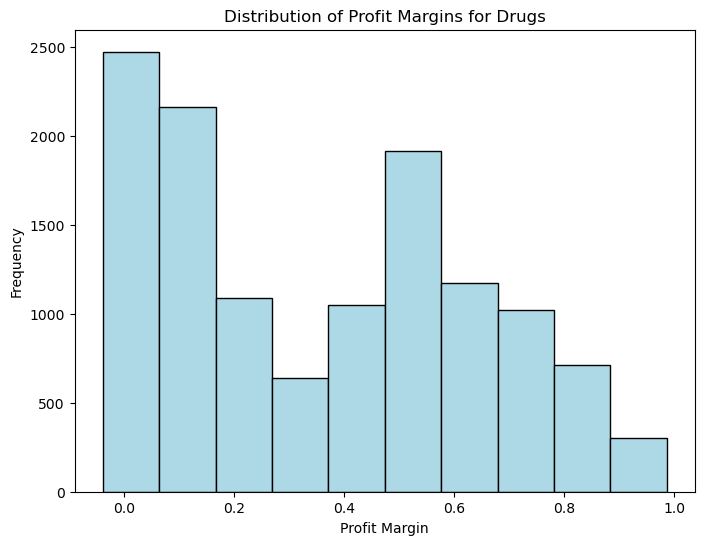

In [88]:
df = df[np.isfinite(df['Profit_Margin'])]
plt.figure(figsize=(8, 6))
plt.hist(df['Profit_Margin'], bins=10, color='lightblue', edgecolor='black')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.title('Distribution of Profit Margins for Drugs')
plt.show()

In [64]:
df1=df[df['ReturnQuantity']>0]
df2=df[df['RtnMRP']>0]
# Calculate the return rate for each product (ReturnQuantity / RtnMRP)
df['Return_Rate'] = df1['ReturnQuantity']/ df2['RtnMRP']

# Sort the products based on their return rate in descending order
sortreturn = df.sort_values(by='Return_Rate', ascending=False)

# Get the products with high return rates (You can adjust the threshold as needed)
high_returnRates = sortreturn[sortreturn['Return_Rate'] > 0.01]

# Display the products with high return rates and their return quantities and sales
high_returnRates[['DrugName', 'ReturnQuantity', 'RtnMRP', 'Return_Rate']]
#By Analyzing High_return_rates we can investigate the root cause and improve customer engagement

,DrugName,ReturnQuantity,RtnMRP,Return_Rate
4486,ALPRAZOLAM 0.25MG,1,40,0.025000
1891,LORAZEPAM 1MG,1,40,0.025000
8549,,4,162,0.024691
7736,,20,810,0.024691
8999,WATER FOR INJECTION 10ML SOLUTION,2,81,0.024691
...,...,...,...,...
1021,MULTIPLE ELECTROLYTES 500ML IVF,1,97,0.010309
9375,MULTIPLE ELECTROLYTES 500ML IVF,1,97,0.010309
3784,MULTIPLE ELECTROLYTES 500ML IVF,2,194,0.010309
8016,MULTIPLE ELECTROLYTES 500ML IVF,1,97,0.010309


<Axes: title={'center': 'Return rate for Drugs with High Return Rates'}, xlabel='DrugName', ylabel='Return_Rate'>

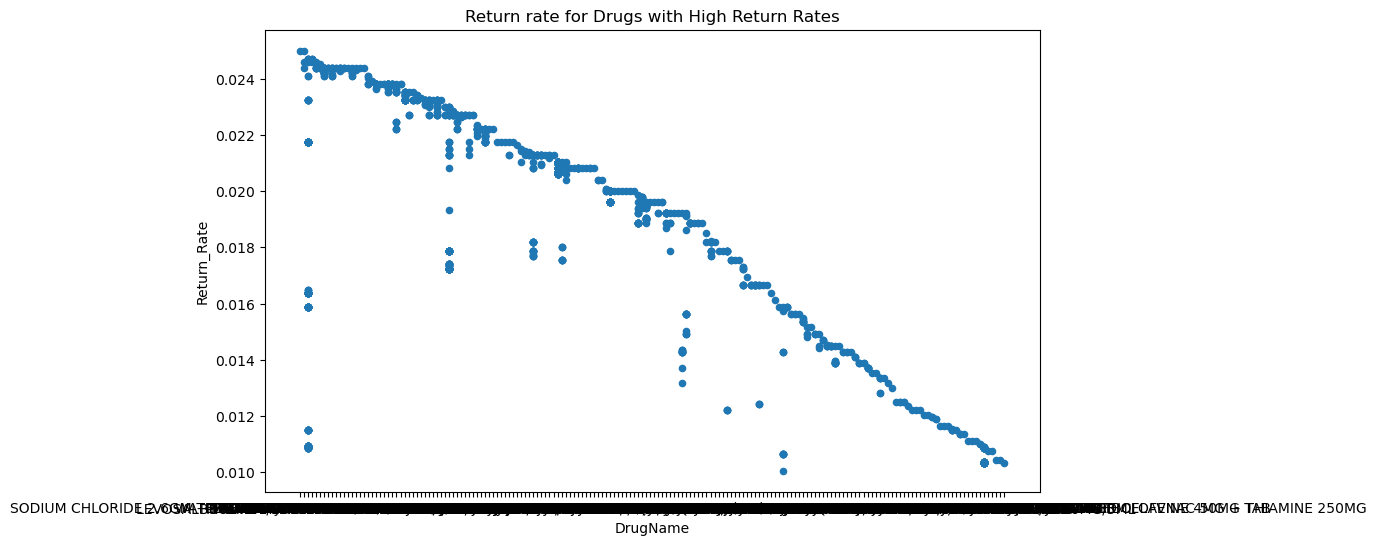

In [84]:
#visualizing Retrun rate for products with High return Rates
high_returnRates.plot(kind='scatter',x='DrugName',y='Return_Rate',figsize=(10,6),title='Return rate for Drugs with High Return Rates')

In [73]:
# Bounce rate analysis

# Calculate the total quantity purchased by each patient
total_quantity_purchased = df.groupby('Patient_ID')['Quantity'].sum()

# Calculate the total quantity returned by each patient
total_quantity_returned = df.groupby('Patient_ID')['ReturnQuantity'].sum()

# Calculate the bounce rate for each patient
bounce_rate = (total_quantity_returned / total_quantity_purchased) * 100

# Calculate the overall bounce rate for all patients
overall_bounce_rate = (df['ReturnQuantity'].sum() / df['Quantity'].sum()) * 100
print("Patient-wise Bounce Rate:")
print(bounce_rate)

print("\nOverall Bounce Rate:")
print(round(overall_bounce_rate,2))
# It is observed that overall bounce rate is 13% means 13% of patients tend to return the drugs after purchase
# This analysis will provide insights into the percentage of patients who returned drugs after purchase, 
# allowing you to identify areas for improvement to reduce the bounce rate and improve patient satisfaction.


Patient-wise Bounce Rate:
Patient_ID
12017998218    0.000000
12017998261    0.000000
12017998278    0.000000
12017998291         inf
12017998321    6.779661
                 ...   
12018125255    0.000000
12018125266    0.000000
12018125339    0.000000
12018125341    0.000000
12018125353    0.000000
Length: 4883, dtype: float64

Overall Bounce Rate:
13.08
